## The purpose of this file
**Remove search tag** and more node, if necessary, from the original aam to make optimization feasible.<br>
Make an **modified aggregate adjacency matrix** and save it.

In [1]:
import sys
sys.path.append('../')
import powerlaw
import networkx as nx
import toolbox as tb
%matplotlib inline

In [2]:
tag = "worldcup"
hashtag = "ワールドカップ" # This variable is necessary for data processing in the module 'toolbox'.
timespan = "23-24"
tau = 53
G = nx.read_graphml(f'../data/graph_data/{tag}/original/{hashtag}_{timespan}_{tau}_aam.graphml')

In [3]:
ag = tb.AggregateNetwork(G, tau, hashtag)

In [4]:
ag.tau, ag.searchtag, ag.G.number_of_nodes()

(53, 'ワールドカップ', 12993)

In [5]:
# Check hubs
ag.check_degree()

isolate:[]


,degree
ワールドカップ,12992
サッカー,5636
日本代表,2810
worldcup,2357
サッカー日本代表,2049
...,...
歴史的勝利！！,1
飲もー,1
ドイツ強すぎの前半,1
ノイアーよけた,1


In [6]:
ag.remove_searchtag()

Isolates after removal of the searchtag: 
['姉はどっち応援するんのかなぁ？笑', '飲もー', '日本代表100周年ユニフォーム', 'ファーストペンギン', 'キリン淡麗', '北川太一', 'ドイツ強すぎの前半', '頑張れ〜！！！', 'サムライジャパン！', 'ノイアーよけた', '森保さん', '♾', '大人の絵日記', '歴史的勝利！！', 'おみくじ']
These isolate nodes are to be removed.
The isolate nodes were successfully deleted.


In [7]:
# Check hubs
ag.check_degree()

isolate:[]


,degree
サッカー,5635
日本代表,2809
worldcup,2356
サッカー日本代表,2048
日本,1706
...,...
サムライじゃぱん,1
ジョニーウォーカー,1
日本戦⚽️,1
日本勝利🎉,1


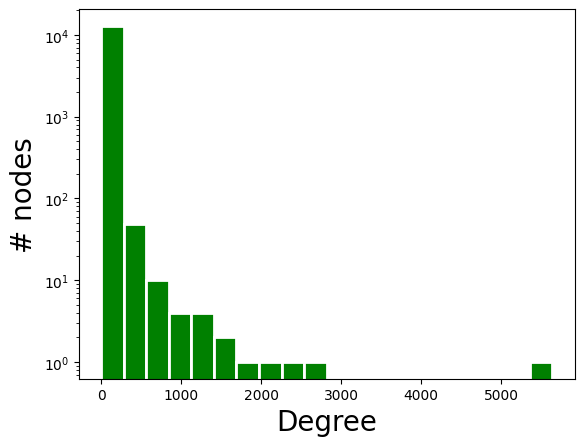

In [8]:
ag.plot_dd(20)

In [9]:
tb.fit_power_law(G)

Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.4795217581512503, 
its standard error sigma: 0.05151033591888451, 
k_min: 55.0


(2.4795217581512503, 0.05151033591888451, 55.0)

In [10]:
tb.compare_distribution(G,"power_law", "exponential")

Calculating best minimal value for power law fit
------------------------------------------------
The power_law distribution outperforms exponential distribution with significance level 2.422970364298928e-06.


In [11]:
tb.compare_distribution(G,"power_law", "lognormal")

Calculating best minimal value for power law fit
------------------------------------------------
The power_law distribution outperforms lognormal distribution with significance level 0.9976608874463089.


In [12]:
# Save figure for future use
fname1 = f"../data/figure/degree_distribution/pdfccdf1_{tag}_{timespan}_{tau}.pdf"
fname2 = f"../data/figure/degree_distribution/pdfccdf2_{tag}_{timespan}_{tau}.pdf"
print(fname1)
print(fname2)

../data/figure/degree_distribution/pdfccdf1_worldcup_23-24_53.pdf
../data/figure/degree_distribution/pdfccdf2_worldcup_23-24_53.pdf


Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.4795217581512503, 
its standard error sigma: 0.05151033591888451, 
k_min: 55.0


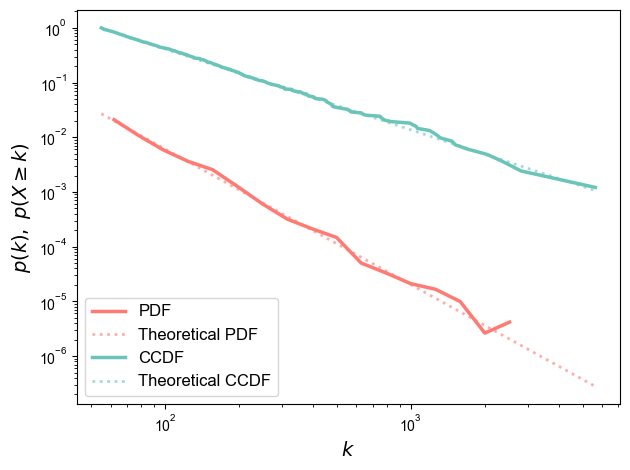

In [13]:
tb.plot_pdf_ccdf(G, Pcolor="#FF7A72", Ccolor="#6AC4BA", fname=fname1)

Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.4795217581512503, 
its standard error sigma: 0.05151033591888451, 
k_min: 55.0


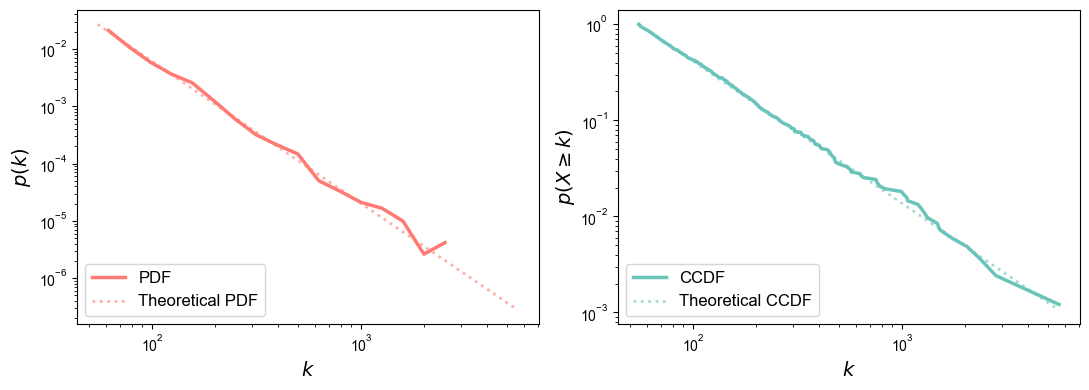

In [14]:
tb.plot_pdf_ccdf(G, sep=True, Pcolor="#FF7A72", Ccolor="#6AC4BA", fname=fname2)

In [15]:
# Save modified aam for statistical test
nx.write_graphml(ag.G, f'../data/graph_data/{tag}/modified/{hashtag}_{timespan}_{tau}_mdaam.graphml', encoding='utf-8')